In [1]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont, ImageColor
import torchvision.transforms as transforms

import numpy as np

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
scaling_factor = 2


In [6]:
#models checkpoint
srcnn_checkpoint = "./saved_models/srcnn/checkpoint_srcnn_25.pth.tar"
#load models
srcnn = torch.load(srcnn_checkpoint)['model'].to(device)
srcnn.eval()


SRCNN(
  (conv1): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

In [7]:
which_img = "butterfly"
img = "./data/Set5/"+ which_img+".png"
# img = "./images/"+ which_img+".jpg"

In [8]:
halve = False

In [9]:
# Load image, downsample to obtain low-res version
hr_img = Image.open(img, mode="r")
# hr_img = hr_img.convert('RGB')
if halve:
    hr_img = hr_img.resize((int(hr_img.width / 2), int(hr_img.height / 2)),
                           Image.LANCZOS)

lr_img = hr_img.resize((int(hr_img.width / 2), int(hr_img.height / 2)),
                       Image.BICUBIC)

In [10]:
bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)

# lr_img = lr_img.convert('pil')
img = lr_img.convert('YCbCr')
img = img.resize((hr_img.width, hr_img.height), Image.BICUBIC)  # first, we upscale the image via bicubic interpolation
y, cb, cr = img.split()

img_to_tensor = transforms.ToTensor()
input = img_to_tensor(y).view(1, -1, y.size[1], y.size[0])  # we only work with the "Y" channel
input = input.to(device)


out = srcnn(input)
out = out.cpu()
out_img_y = out[0].detach().numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img = Image.merge('YCbCr', [out_img_y, cb, cr]).convert('RGB')  

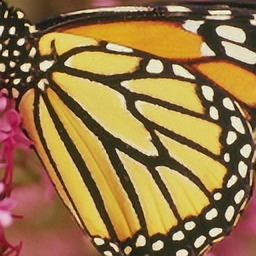

In [11]:
out_img

In [ ]:
# # Create grid
# margin = 40
# grid_img = Image.new('RGB', (2 * hr_img.width + 3 * margin, 2 * hr_img.height + 3 * margin), (95, 114, 125))
# # Font
# draw = ImageDraw.Draw(grid_img)
# textsize = 20
# try:
#     font = ImageFont.truetype("./fonts/Poppins-Light.ttf", size=textsize)
#     # It will also look for this file in your OS's default fonts directory, where you may have the Calibri Light font installed if you have MS Office
#     # Otherwise, use any TTF font of your choice
# except OSError:
#     print(
#         "Defaulting to a terrible font. To use a font of your choice, include the link to its TTF file in the function.")
#     font = ImageFont.load_default()

# font_color = "black"
# img_height = hr_img.height
# img_width = hr_img.width

In [ ]:
# # Place LR image
# # lr_img = lr_img.resize((img_width,img_height),Image.Resampling.LANCZOS)
# # grid_img.paste(lr_img, (margin,margin))
# # width= draw.textlength("LR Image",font)
# # draw.text(xy=[margin + img_width / 2 - width / 2, margin - textsize - 5], text="LR Image", font=font, fill=font_color)
# # Place LR image
# grid_img.paste(lr_img, (int(margin+img_width*0.375),int(margin+img_height*0.375)))
# width= draw.textlength("LR Image",font)
# draw.text(xy=[margin + img_width / 2 - width / 2, margin - textsize - 5], text="LR Image", font=font, fill=font_color)

In [6]:
# grid_img.show()

In [9]:
sr_img_srcnn

NameError: name 'sr_img_srcnn' is not defined

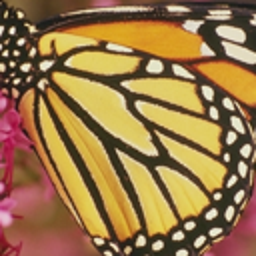

In [36]:
bicubic_img

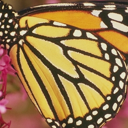

In [89]:
lr_img